# Understanding Descriptive Statistics

Import the necessary libraries here:

In [386]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math
"""
from statsmodels.stats.weightstats import ztest as ztest #Z (z o Pvalue)
from statsmodels.stats.weightstats import zconfint as zconfint #IC
from statsmodels.stats.proportion import proportions_ztest # proportions_ztest

from statsmodels.formula.api import ols as ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import scipy.stats
from scipy.stats import ttest_1samp #T (T o Pvalue)
from scipy.stats import t # T interval
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import chi2_contingency
"""

'\nfrom statsmodels.stats.weightstats import ztest as ztest #Z (z o Pvalue)\nfrom statsmodels.stats.weightstats import zconfint as zconfint #IC\nfrom statsmodels.stats.proportion import proportions_ztest # proportions_ztest\n\nfrom statsmodels.formula.api import ols as ols\nfrom statsmodels.stats.multicomp import pairwise_tukeyhsd\n\nimport scipy.stats\nfrom scipy.stats import ttest_1samp #T (T o Pvalue)\nfrom scipy.stats import t # T interval\nfrom scipy.stats import ttest_ind\nfrom scipy.stats import ttest_rel\nfrom scipy.stats import chi2_contingency\n'

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [387]:
# your code here
def rolling_dice(times):
    dice = pd.DataFrame([random.choice(range(1, 6)) for i in range(times)], columns = ["dice"])
    return dice

In [388]:
rolled = rolling_dice(10)
rolled

,dice
0,1
1,4
2,2
3,3
4,1
5,4
6,2
7,1
8,2
9,3


#### 2.- Plot the results sorted by value.

<AxesSubplot:>

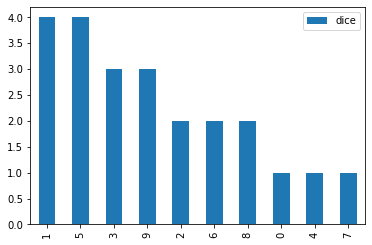

In [389]:
# your code here
rolled_sorted = rolled.sort_values(by="dice",ascending=False)
rolled_sorted.plot.bar()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [390]:
#we can see how the values have been repeted
rolled.value_counts()

dice
1       3
2       3
3       2
4       2
dtype: int64

In [391]:
#the frequency is 
frequency, bins = np.histogram(rolled_sorted, bins=5)
frequency

array([3, 3, 0, 2, 2], dtype=int64)

<AxesSubplot:ylabel='Frequency'>

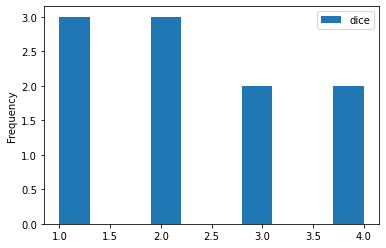

In [392]:
# your code here
rolled_sorted.plot.hist(y="dice",bins=10)

In [393]:
"""in the first plot we just plot the values in the orded the dice has rolled. In the second one we plot its frequency, which means to plot the unique values and the number of times we have obtained those values"""

'in the first plot we just plot the values in the orded the dice has rolled. In the second one we plot its frequency, which means to plot the unique values and the number of times we have obtained those values'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [394]:
# your code here
def mean_df(df):
    sum_df = df.sum()[0]
    n = len(df)
    mean = (sum_df/n)
    return mean

In [395]:
mean_df(rolled_sorted)

2.3

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [396]:
def freq_mean(df):
    frequency, bins = np.histogram(df, bins=int(len(df)/2))
    values= np.arange(1,len(frequency)+1)
    main_df = sum(frequency*values)/len(df)
    return main_df

In [397]:
freq_mean(rolled_sorted)

2.7

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [398]:
rolled_sorted

,dice
1,4
5,4
3,3
9,3
2,2
6,2
8,2
0,1
4,1
7,1


In [399]:
def median_df(df):
    if len(df)%2 == 0:
        return (df.iloc[int((len(df)/2-1)),0]+df.iloc[int(len(df)/2),0])/2
    else:
        return df.iloc[math.floor(len(df)/2),0]

In [400]:
median_df(rolled_sorted)

2.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [401]:
# your code here
print(rolled_sorted.quantile(0.25))
print(rolled_sorted.quantile(0.50))
print(rolled_sorted.quantile(0.75))
print(rolled_sorted.quantile(1))

dice    1.25
Name: 0.25, dtype: float64
dice    2.0
Name: 0.5, dtype: float64
dice    3.0
Name: 0.75, dtype: float64
dice    4.0
Name: 1.0, dtype: float64


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [415]:
# your code here
df_ch3 = pd.read_csv("../data/roll_the_dice_hundred.csv")
#del df_ch3["Unnamed: 0"]
#del df_ch3["roll"]
df_ch3_2 = df_ch3.sort_values(by="value").reset_index(drop=True)

<AxesSubplot:>

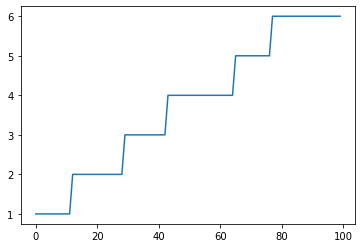

In [416]:
df_ch3_2["value"].plot()

<AxesSubplot:>

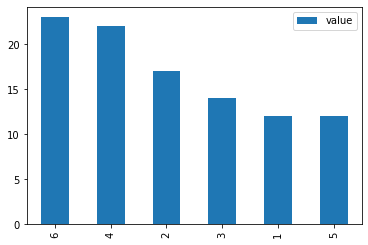

In [417]:
pd.DataFrame(df_ch3_2["value"].value_counts()).plot.bar()

In [418]:
"""plot this df without a frequency is not very usefull. In the first graph we can see which number appeared more through its line length. In the second one we can see the same but visually, quickly and concisely."""

'plot this df without a frequency is not very usefull. In the first graph we can see which number appeared more through its line length. In the second one we can see the same but visually, quickly and concisely.'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [419]:
# your code here
mean_df(pd.DataFrame(df_ch3_2["value"]))

3.74

#### 3.- Now, calculate the frequency distribution.


In [420]:
df_ch3_2_freq = pd.DataFrame(df_ch3_2["value"].value_counts())
df_ch3_2_freq

,value
6,23
4,22
2,17
3,14
1,12
5,12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:>

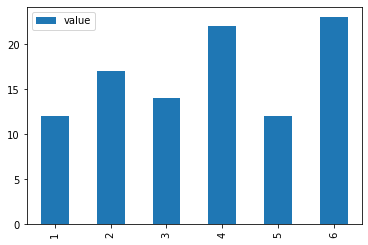

In [421]:
df_ch3_2_freq.sort_index().plot.bar()

In [422]:
"""we have more values in the upper part of the table, but without a large deviation"""

'we have more values in the upper part of the table, but without a large deviation'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [425]:
# your code here
df_ch3_2_thousand = pd.read_csv("../data/roll_the_dice_thousand.csv")
df_ch3_2_thousand = df_ch3_2_thousand.sort_values(by="value").reset_index(drop=True)
df_ch3_2_thousand.head()

,Unnamed: 0,roll,value
0,564,564,1
1,922,922,1
2,560,560,1
3,213,213,1
4,214,214,1


<AxesSubplot:>

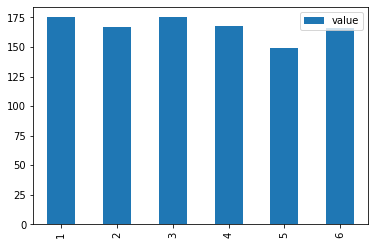

In [427]:
# your code here
df_ch3_2_thousand_freq = pd.DataFrame(df_ch3_2_thousand["value"].value_counts())
df_ch3_2_thousand_freq.sort_index().plot.bar()

In [428]:
mean_df(pd.DataFrame(df_ch3_2_thousand["value"]))

3.447

In [429]:
"""The distribution has tended to normalize to the mean value of the table, because all the values are more similar now"""

'The distribution has tended to normalize to the mean value of the table, because all the values are more similar now'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [450]:
# your code here
df_ages_population = pd.read_csv("../data/ages_population.csv")
df_ages_population = df_ages_population.astype("int64")
df_ages_population.head()

,observation
0,68
1,12
2,45
3,38
4,49


<AxesSubplot:>

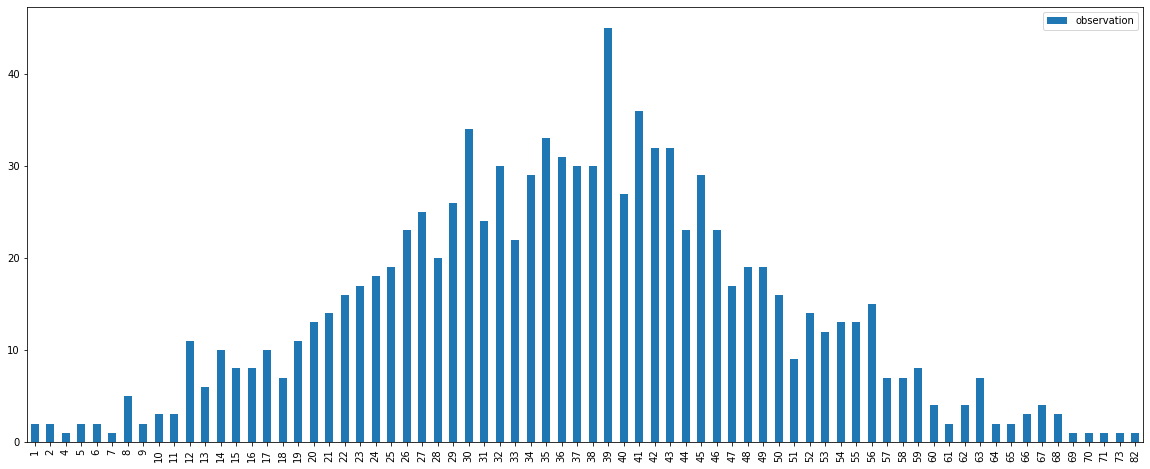

In [455]:
df_ages_population_freq = pd.DataFrame(df_ages_population["observation"].value_counts())
df_ages_population_freq.sort_index().plot.bar(figsize=(20,8))

In [459]:
"""taking a simple look the mean could be between 35 and 40"""

'taking a simple look the mean could be between 35 and 40'

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [458]:
df_ages_population.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [460]:
"""pretty similar"""

'pretty similar'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [451]:
# your code here
df_ages_population2 = pd.read_csv("../data/ages_population2.csv")
df_ages_population2 = df_ages_population2.astype("int64")
df_ages_population2.head()

,observation
0,25
1,31
2,29
3,31
4,29


<AxesSubplot:>

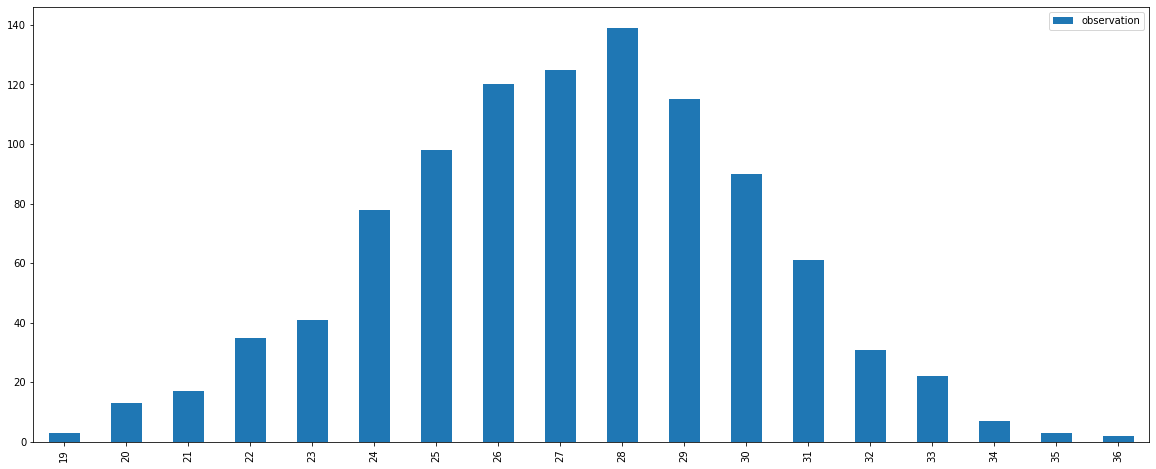

In [461]:
df_ages_population2_freq = pd.DataFrame(df_ages_population2["observation"].value_counts())
df_ages_population2_freq.sort_index().plot.bar(figsize=(20,8))

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [465]:
"""The distribution is very simmilar, it is a classic population pyramid, but with a smallest range and deviation"""

'The distribution is very simmilar, it is a classic population pyramid, but with a smallest range and deviation'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [463]:
# your code here
df_ages_population2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [466]:
"""It has a less range and most of the values are concentrated in the middle, so the standard deviation is very small"""

'It has a less range and most of the values are concentrated in the middle, so the standard deviation is very small'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [476]:
# your code here
# your code here
df_ages_population3 = pd.read_csv("../data/ages_population3.csv")
df_ages_population3 = df_ages_population3.astype("int64")
df_ages_population3.head()

,observation
0,21
1,21
2,24
3,31
4,54


<AxesSubplot:>

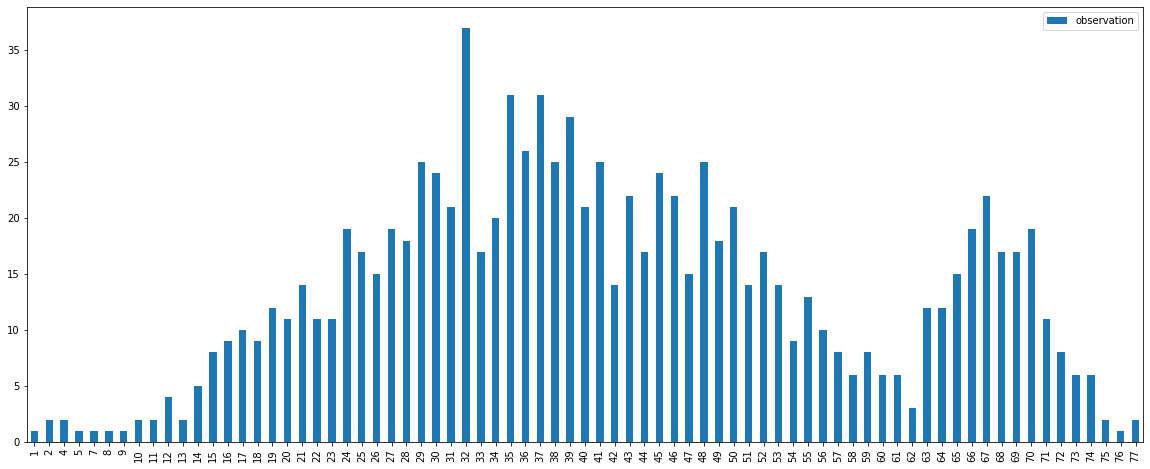

In [477]:
df_ages_population3_freq = pd.DataFrame(df_ages_population3["observation"].value_counts())
df_ages_population3_freq.sort_index().plot.bar(figsize=(20,8))

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [478]:
# your code here
df_ages_population3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [479]:
"""Here the population pyramid is more similar to the current spanish population pyramid, which means an aging population. Therefore, its mean and its std are higher"""

'Here the population pyramid is more similar to the current spanish population pyramid, which means an aging population. Therefore, its mean and its std are higher'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [481]:
# your code here
print("starting in 1")
print("quantile 1 ends in: "+ str(df_ages_population3.quantile(0.25)[0]))
print("quantile 2 ends in: "+ str(df_ages_population3.quantile(0.50)[0]))
print("quantile 3 ends in: "+ str(df_ages_population3.quantile(0.75)[0]))
print("quantile 4 ends in: "+ str(df_ages_population3.quantile(1)[0]))

starting in 1
quantile 1 ends in: 30.0
quantile 2 ends in: 40.0
quantile 3 ends in: 53.0
quantile 4 ends in: 77.0


In [490]:
print("median: " + str(df_ages_population3.median()[0]))
print("mean: " + str(df_ages_population3.mean()[0]))
print("Its difference is very small, because it is a normal distribution, but this difference is higher than in the first plot because here we have older population")

median: 40.0
mean: 41.989
Its difference is very small, because it is a normal distribution, but this difference is higher than in the first plot because here we have older population


#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [510]:
# 0,14
print("quantile 1 ends in: "+ str(df_ages_population3.quantile(0.10)[0]) + ". Difference between the min value and the first quantile: 21")
print("quantile 1 ends in: "+ str(df_ages_population3.quantile(0.90)[0]) + ". Difference between the max value and the last quantile: 10")
print("So it means that the population is more than the double between the highest part of the pyramid and its lowest part")

quantile 1 ends in: 22.0. Difference between the min value and the first quantile: 21
quantile 1 ends in: 67.0. Difference between the max value and the last quantile: 10
So it means that the population is more than the double between the highest part of the pyramid and its lowest part


## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [514]:
# your code here
import cufflinks as cf 
cf.go_offline()

In [533]:
bonus_df = pd.concat([df_ages_population_freq.sort_index(),df_ages_population3_freq.sort_index()], axis=1).fillna(0).astype("int64")
bonus_df.columns=["population1","population2"]
bonus_df

,population1,population2
1,2,1
2,2,2
4,1,2
5,2,1
6,2,0
...,...,...
74,0,6
75,0,2
76,0,1
77,0,2


In [541]:
bonus_df.iplot(kind="bar")

In [556]:
px.bar(data_frame=bonus_df
             ,width=1000, height=600
             , barmode="group")

In [ ]:
"""
your comments here
"""